In [9]:
import keras 
import gc

class CleanUpCallback(keras.callbacks.Callback):

  # Callback after each epoch
  def on_epoch_end(self,epochs,logs=None):
    # print(f"Loss: {logs['loss']}")
    print("Cleaning up after each epoch to save memory")
    gc.collect()

In [2]:
# import Dataset from given link
# Get dataset from keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import sys
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np
import tensorflow as tf

In [3]:
# Preparing data for processing
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset 
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# One hot encode label values
trainy = tf.one_hot(trainy.astype(np.int32), depth=10)
testy = tf.one_hot(testy.astype(np.int32), depth=10)
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 


11501568/11490434 [==============================] - 0s 0us/step


In [4]:

# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1
# Initialize the model
scores =[]
functions = ['sigmoid','relu','elu','selu','tanh']
def create_model(node_function):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))

    # Add another conv layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation=node_function, kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    history = model.fit(train_norm, trainy, epochs=20, batch_size=128, verbose=0,validation_split=0.2,callbacks=CleanUpCallback())
    model.save(f"models/mnist_{node_function}")
    scores.append(history)
    print(model.summary())
    return model,history


Creating model...
Training model...
Loss: 1.0359114408493042
Cleaning up after each epoch to save memory
Loss: 0.25456252694129944
Cleaning up after each epoch to save memory
Loss: 0.1393410712480545
Cleaning up after each epoch to save memory
Loss: 0.09809011965990067
Cleaning up after each epoch to save memory
Loss: 0.07763469964265823
Cleaning up after each epoch to save memory
Loss: 0.06467066705226898
Cleaning up after each epoch to save memory
Loss: 0.05573286861181259
Cleaning up after each epoch to save memory
Loss: 0.04899667203426361
Cleaning up after each epoch to save memory
Loss: 0.04462432861328125
Cleaning up after each epoch to save memory
Loss: 0.03979235887527466
Cleaning up after each epoch to save memory
Loss: 0.0361989326775074
Cleaning up after each epoch to save memory
Loss: 0.033052969723939896
Cleaning up after each epoch to save memory
Loss: 0.03041808307170868
Cleaning up after each epoch to save memory
Loss: 0.02777661196887493
Cleaning up after each epoch t

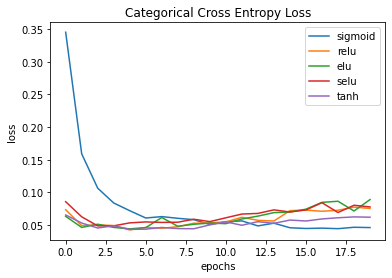

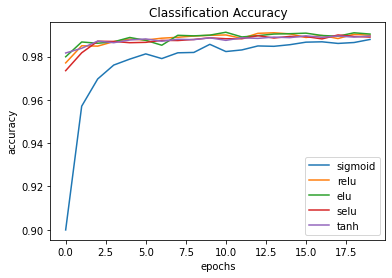

In [5]:
# Main entry point for training model

if __name__ == "__main__":

    
    print("Creating model...")
    # List for validation accuracy
    acc = []
    # List for validation loss
    loss = []
    for function in functions:
      print("Training model...")
      model,history = create_model(node_function=function)
      # Plot the accuracy
      print("Storing scores...")

      loss.append(history.history["val_loss"])
      acc.append(history.history["val_accuracy"])

    plt.plot(loss[0],label=functions[0])
    plt.plot(loss[1],label=functions[1])
    plt.plot(loss[2],label=functions[2])
    plt.plot(loss[3],label=functions[3])
    plt.plot(loss[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss")
    plt.savefig("mnist_node_function_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(acc[0],label=functions[0])
    plt.plot(acc[1],label=functions[1])
    plt.plot(acc[2],label=functions[2])
    plt.plot(acc[3],label=functions[3])
    plt.plot(acc[4],label=functions[4])
    plt.title("Classification Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("mnist_node_function_accuracy_plot.png")
    plt.legend()  
    plt.show()          

In [ ]:
# Second Part of the exercise begins here
# 
# CIFAR10  dataset 
# 
# 

In [3]:
# Needed libraries are imported here
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2


In [4]:
# Node functions to be used
functions = ['sigmoid','relu','elu','selu','tanh']

In [5]:
# load dataset
(trainX, trainY),(testX,testY) = cifar10.load_data()
# One hot encode label values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 

In [12]:
# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1 for the first Conv layer
# 64 filters with filter size of 3x3 and a stride of 1 for the second Conv layer
# Initialize the model
scores =[]
def create_model(node_function):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation=node_function, kernel_initializer='he_uniform', padding='same' , kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Add another conv layer
    model.add(Conv2D(64, (3, 3), activation=node_function, kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=node_function, kernel_initializer='he_uniform',  kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_norm, trainY, epochs=50, batch_size=128, verbose=1,validation_data=(test_norm,testY),callbacks=CleanUpCallback())
    model.save(f"models/cifar10_{node_function}")
    scores.append(history)
    # Print model summary for documentation
    model.summary()
    return model,history


In [ ]:
if __name__ == "__main__":

    functions = ['sigmoid','relu','elu','selu','tanh']
    print("Creating model...")
    # Lists to hold validation losses and accuracy
    losses = []
    accuracy = []
    for function in functions:
      print("Training model...")
      model,history = create_model(node_function=function)

      losses.append(history.history["val_loss"])
      accuracy.append(history.history["val_accuracy"])
    
    plt.plot(losses[0],label=functions[0])
    plt.plot(losses[1],label=functions[1])
    plt.plot(losses[2],label=functions[2])
    plt.plot(losses[3],label=functions[3])
    plt.plot(losses[4],label=functions[4])
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss")
    plt.savefig("cifar10_node_function_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(accuracy[0],label=functions[0])
    plt.plot(accuracy[1],label=functions[1])
    plt.plot(accuracy[2],label=functions[2])
    plt.plot(accuracy[3],label=functions[3])
    plt.plot(accuracy[4],label=functions[4])
    plt.title("Classification Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("cifar10_node_function_accuracy_plot.png")
    plt.legend()  
    plt.show()